In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df4 = pd.read_csv("./Data/df4.csv")

In [6]:
# les fichier CSV
df10 = pd.read_csv("./Data/book1-100k.csv")
df11 = pd.read_csv("./Data/book100k-200k.csv")
df12 = pd.read_csv("./Data/book200k-300k.csv")
df13= pd.read_csv("./Data/book500k-600k.csv")
df14= pd.read_csv("./Data/book600k-700k.csv")
df15= pd.read_csv("./Data/book700k-800k.csv")
df16= pd.read_csv("./Data/book800k-900k.csv")
df17= pd.read_csv("./Data/book900k-1000k.csv")
df18= pd.read_csv("./Data/book1000k-1100k.csv")
df19= pd.read_csv("./Data/book1100k-1200k.csv")
df20= pd.read_csv("./Data/book1200k-1300k.csv")
df21= pd.read_csv("./Data/book1300k-1400k.csv")
df22= pd.read_csv("./Data/book1400k-1500k.csv")
df23= pd.read_csv("./Data/book1500k-1600k.csv")
df24= pd.read_csv("./Data/book1600k-1700k.csv")
df25= pd.read_csv("./Data/book1700k-1800k.csv")
df26= pd.read_csv("./Data/book1800k-1900k.csv")
df27= pd.read_csv("./Data/book1900k-2000k.csv")

# df qu'on à fusionner
dfs = [df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27]

df_final = pd.concat(dfs, axis=0, ignore_index=True, join='inner')

# Version finale vers un fichier CSV
df_final.to_csv("./Data/df4.csv", index=False)

In [7]:
df_final.to_csv("./Data/df_final.csv", index=False)


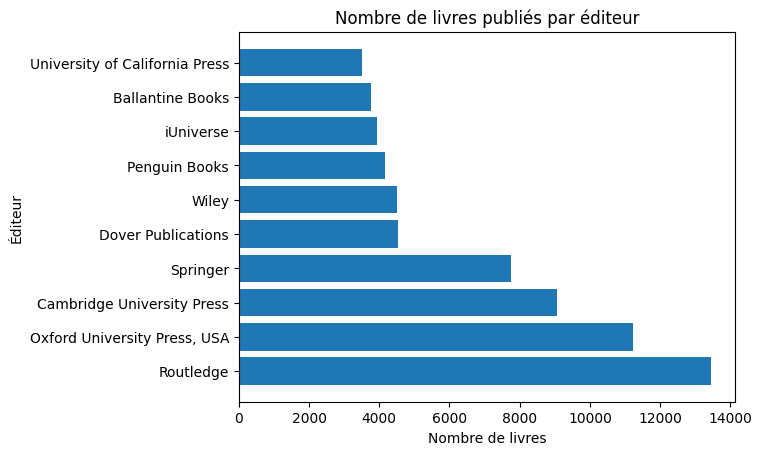

In [8]:
books_per_publisher = df_final.groupby('Publisher')['ISBN'].count().sort_values(ascending=False)[:10]

plt.barh(books_per_publisher.index, books_per_publisher.values)

plt.title('Nombre de livres publiés par éditeur')
plt.xlabel('Nombre de livres')
plt.ylabel('Éditeur')
plt.show()


In [9]:
# Calcul de la note moyenne pour chaque éditeur du dataset final
mean_rating_by_publisher = df_final.groupby('Publisher')['Rating'].mean()


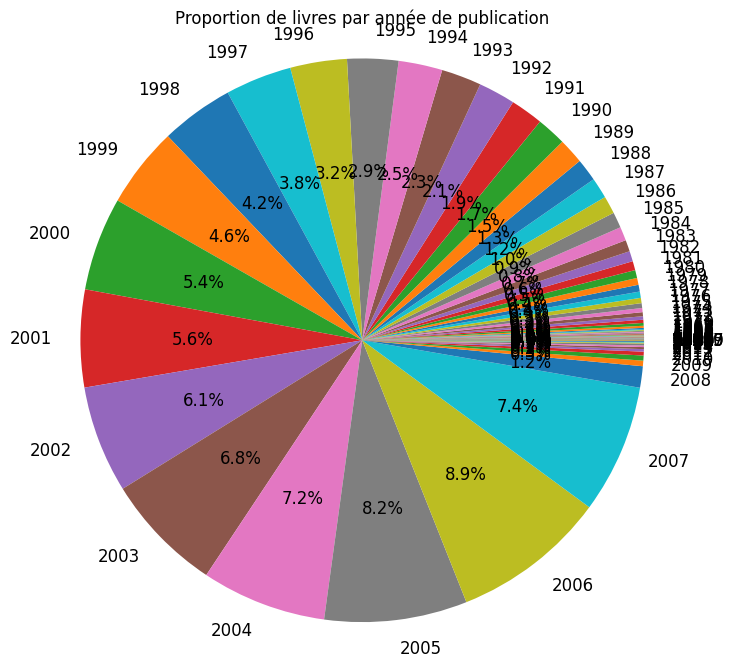

In [10]:
# la proportin de livre par année de publication
books_per_year = df_final.groupby('PublishYear').size()
plt.figure(figsize=(8,8))

plt.pie(books_per_year, labels=books_per_year.index, autopct='%0.1f%%', textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Proportion de livres par année de publication')
plt.show()


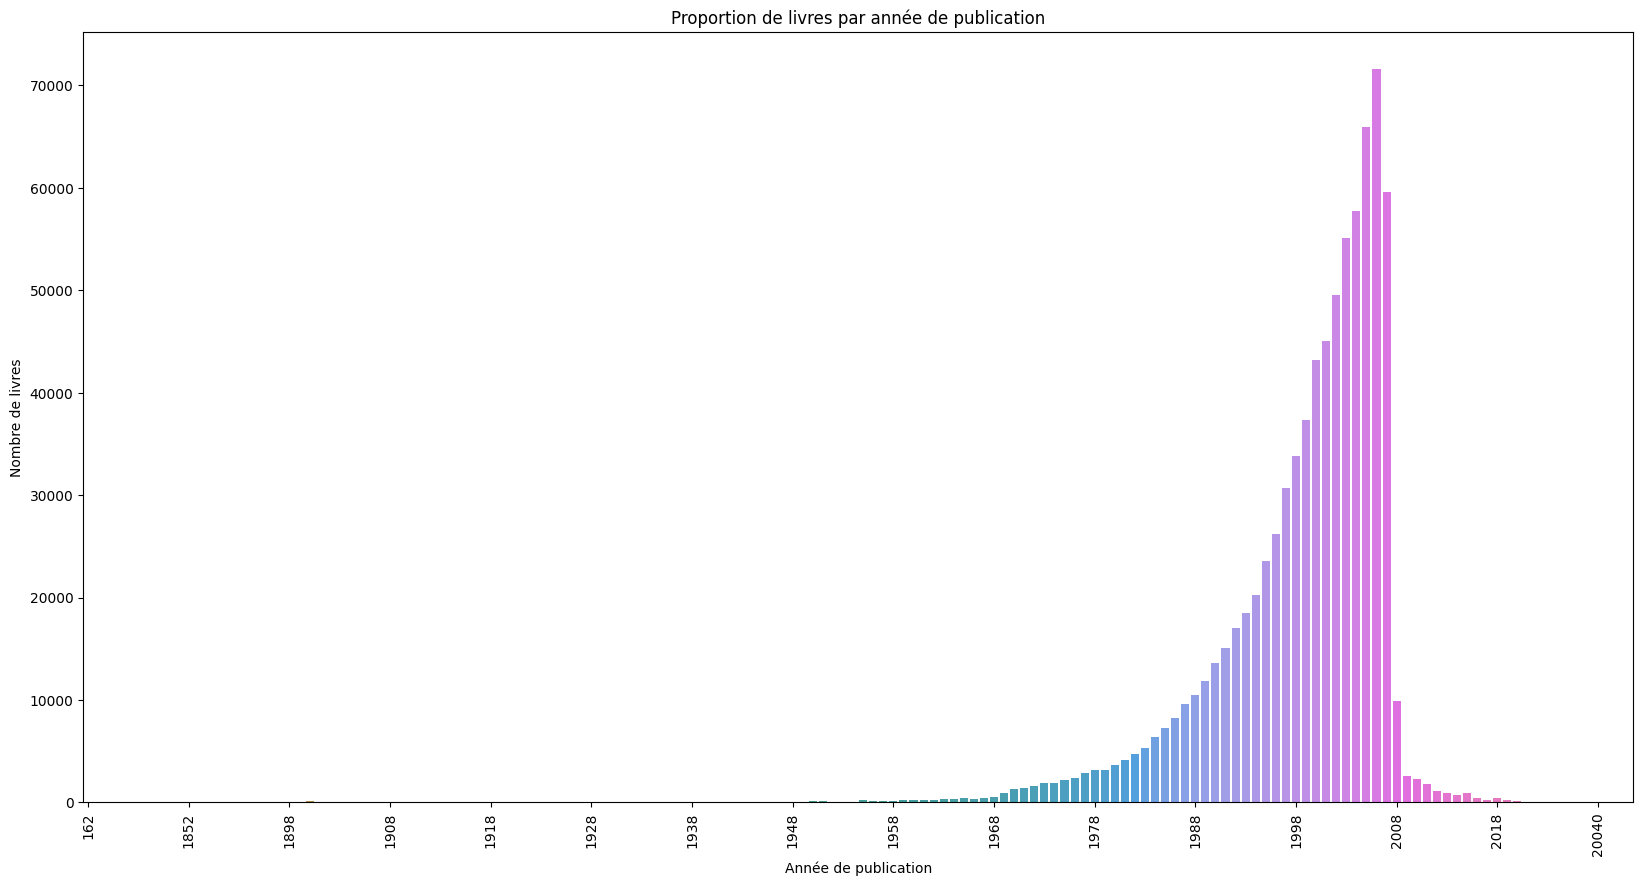

In [11]:
books_per_year = df_final.groupby('PublishYear').size()
plt.figure(figsize=(20,10))

sns.barplot(x=books_per_year.index, y=books_per_year.values, palette='husl')
plt.title('Proportion de livres par année de publication')
plt.xlabel('Année de publication')
plt.ylabel('Nombre de livres')

plt.xticks(rotation=90)
plt.xticks(range(0, len(books_per_year.index), 10), books_per_year.index[::10])
plt.show()
#Non retenue


In [12]:
# Nveau dataset
books_df = pd.read_csv("./Data/1Books.csv")
users_df = pd.read_csv("./Data/1Users.csv")
ratings_df = pd.read_csv("./Data/1Ratings.csv")


# Fusionner les datasets
merged_df = pd.merge(ratings_df, books_df, on='ISBN')
merged_df = pd.merge(merged_df, users_df, on='User-ID')
print(merged_df.head())


C:\Users\User\AppData\Local\Temp\ipykernel_14848\2450761107.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("./Data/1Books.csv")


   User-ID        ISBN  Book-Rating  \
0   276725  034545104X            0   
1     2313  034545104X            5   
2     2313  0812533550            9   
3     2313  0679745580            8   
4     2313  0060173289            9   

                                         Book-Title       Book-Author  \
0                              Flesh Tones: A Novel        M. J. Rose   
1                              Flesh Tones: A Novel        M. J. Rose   
2     Ender's Game (Ender Wiggins Saga (Paperback))  Orson Scott Card   
3             In Cold Blood (Vintage International)     TRUMAN CAPOTE   
4  Divine Secrets of the Ya-Ya Sisterhood : A Novel     Rebecca Wells   

  Year-Of-Publication         Publisher  \
0                2002  Ballantine Books   
1                2002  Ballantine Books   
2                1986         Tor Books   
3                1994           Vintage   
4                1996     HarperCollins   

                                         Image-URL-S  \
0  http://i

In [13]:
merged_df.to_csv("./Data/merged_df.csv", index=False)

In [14]:

half_size = len(merged_df) // 2
half_df = merged_df[:half_size]
merged_df = merged_df.drop(merged_df.index[half_size:])
merged_df.to_csv("./Data/merged_df.csv", index=False)

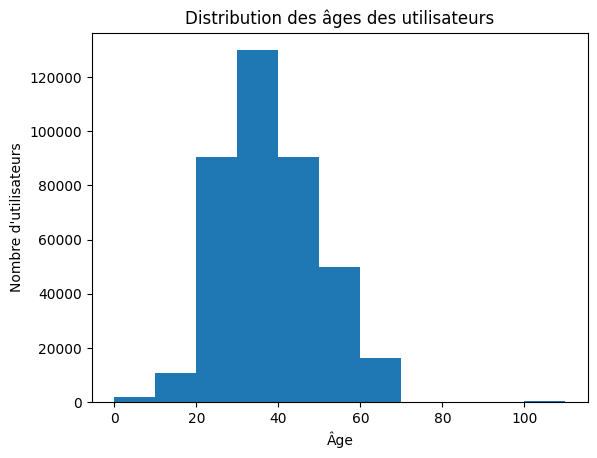

In [15]:
import matplotlib.pyplot as plt

# Supprimer les valeurs NaN qui sont vides
merged_df = merged_df.dropna()

# histogramme de la distribution des age
plt.hist(merged_df['Age'], bins=range(0, 120, 10))
plt.xlabel('Âge')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution des âges des utilisateurs')
plt.show()


In [16]:
merged_df.to_csv("./Data/merged_df.csv", index=False)

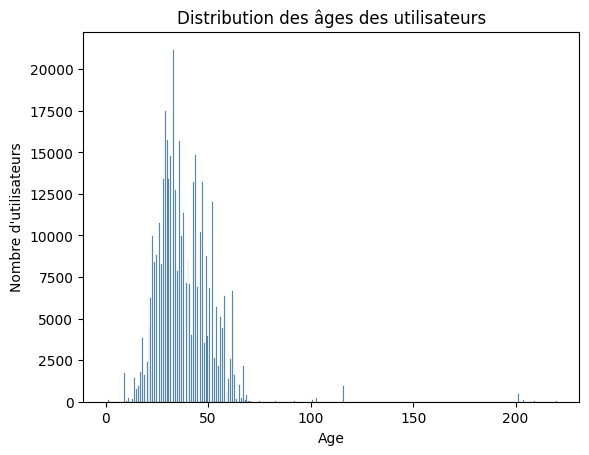

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(merged_df['Age'].dropna(), kde=False)
plt.xlabel('Age')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution des âges des utilisateurs')
plt.show()


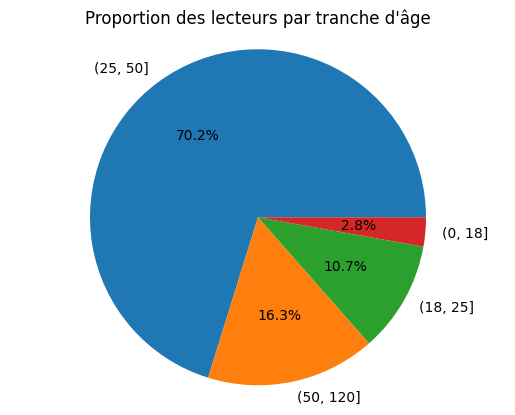

In [18]:
import matplotlib.pyplot as plt

age_groups = pd.cut(merged_df['Age'], [0, 18, 25, 50, 120])
age_counts = round(age_groups.value_counts(normalize=True) * 100, 1)

plt.pie(age_counts, labels=age_counts.index, autopct='%.1f%%')
plt.axis('equal')
plt.title('Proportion des lecteurs par tranche d\'âge')
plt.show()

#Retenu

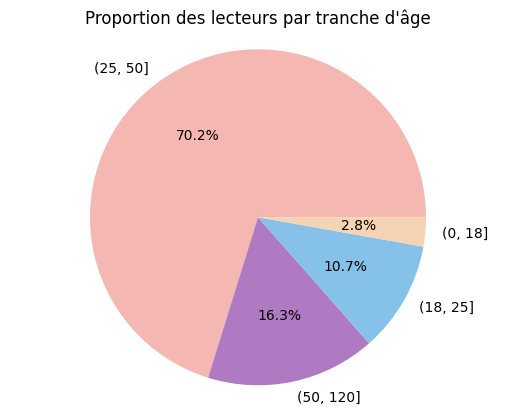

In [19]:
age_groups = pd.cut(merged_df['Age'], [0, 18, 25, 50, 120])
age_counts = round(age_groups.value_counts(normalize=True) * 100, 1)

# Couleurs modifier pour que le graph colle au theme de l'application
colors = ['#F5B7B1', '#AF7AC1', '#85C1E9', '#F5D3B3']
plt.pie(age_counts, labels=age_counts.index, autopct='%.1f%%', colors=colors)
plt.axis('equal')
plt.title('Proportion des lecteurs par tranche d\'âge')
plt.show()


In [20]:
merged_df = pd.read_csv(r"C:\Users\User\Desktop\Ynov_B3_Data_BookStoryTelling-main\Python\Data/merged_df.csv")

In [21]:
merged_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
1,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
2,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
3,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0
4,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,http://images.amazon.com/images/P/0385482388.0...,http://images.amazon.com/images/P/0385482388.0...,http://images.amazon.com/images/P/0385482388.0...,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
391205,180571,3462027425,0,Die Gunnar-Lennefsen-Expedition: Roman,Kathrin Schmidt,1998,Kiepenheuer &amp; Witsch,http://images.amazon.com/images/P/3462027425.0...,http://images.amazon.com/images/P/3462027425.0...,http://images.amazon.com/images/P/3462027425.0...,"bielefeld, nordrhein-westfalen, germany",52.0
391206,180571,3462027972,0,Die SchÃ?Â¶nschreibÃ?Â¼bungen des Gilbert Hasd...,Herbert Rosendorfer,1999,Kiepenheuer &amp; Witsch,http://images.amazon.com/images/P/3462027972.0...,http://images.amazon.com/images/P/3462027972.0...,http://images.amazon.com/images/P/3462027972.0...,"bielefeld, nordrhein-westfalen, germany",52.0
391207,180571,3492235409,4,Die Zeit der Schmetterlinge.,Julia Alvarez,2002,Piper,http://images.amazon.com/images/P/3492235409.0...,http://images.amazon.com/images/P/3492235409.0...,http://images.amazon.com/images/P/3492235409.0...,"bielefeld, nordrhein-westfalen, germany",52.0
391208,180571,3548253776,7,Die Legende der Catherine M.,Jacques Henric,2001,Ullstein Taschenbuch Verlag,http://images.amazon.com/images/P/3548253776.0...,http://images.amazon.com/images/P/3548253776.0...,http://images.amazon.com/images/P/3548253776.0...,"bielefeld, nordrhein-westfalen, germany",52.0


In [22]:
merged_df = merged_df.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

In [23]:
merged_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
1,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
2,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
3,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
4,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
391205,180571,3462027425,0,Die Gunnar-Lennefsen-Expedition: Roman,Kathrin Schmidt,1998,Kiepenheuer &amp; Witsch,"bielefeld, nordrhein-westfalen, germany",52.0
391206,180571,3462027972,0,Die SchÃ?Â¶nschreibÃ?Â¼bungen des Gilbert Hasd...,Herbert Rosendorfer,1999,Kiepenheuer &amp; Witsch,"bielefeld, nordrhein-westfalen, germany",52.0
391207,180571,3492235409,4,Die Zeit der Schmetterlinge.,Julia Alvarez,2002,Piper,"bielefeld, nordrhein-westfalen, germany",52.0
391208,180571,3548253776,7,Die Legende der Catherine M.,Jacques Henric,2001,Ullstein Taschenbuch Verlag,"bielefeld, nordrhein-westfalen, germany",52.0


In [24]:
merged_df.to_csv(r'C:\Users\User\Desktop\Ynov_B3_Data_BookStoryTelling-main\Python\Data\merged_df2.csv', index=False)


In [25]:
df_final2 = df_final[df_final['CountsOfReview'] >= 100]


In [26]:
df_final2

,Id,Name,RatingDist1,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803657,1995294,The Lives They Left Behind: Suitcases from a S...,1:77,4:1004,total:3123,1,1,Bellevue Literary Press,280,2008,eng,Darby Penney,3.66,2:335,5:780,1934137073,3:927
804103,1996409,"Dragonflight (Pern: Dragonriders of Pern, #1)",1:2095,4:41093,total:122980,4,12,Del Rey Books,179,1979,eng,Anne McCaffrey,4.09,2:5305,5:51517,0345284267,3:22970
804445,1997097,The Divorce Party,1:78,4:991,total:2943,5,15,Viking,266,2008,eng,Laura Dave,3.50,2:320,5:481,0670018597,3:1073
805196,1998880,My Enemy's Cradle,1:82,4:2690,total:6442,1,1,Houghton Mifflin Harcourt,683,2008,en-US,Sara Young,4.05,2:242,5:2241,0151015376,3:1187


In [27]:
df_final2.to_csv("./Data/df_final2.csv", index=False)


In [28]:
import requests

def get_isbn(name, author):
    query = name + ' ' + author
    url = f'http://openlibrary.org/search.json?q={query}&limit=1'
    response = requests.get(url)
    df_final2 = response.json()
    if df_final2['num_found'] > 0:
        works = df_final2['docs'][0]['title']
        url = f'https://openlibrary.org{works["key"]}.json'
        response = requests.get(url)
        df_final2 = response.json()
        if 'isbn_13' in df_final2:
            return df_final2['isbn_13'][0]
        elif 'isbn_10' in df_final2:
            return df_final2['isbn_10'][0]
    return None


C:\Users\User\AppData\Local\Temp\ipykernel_14848\716892130.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_final2, x="Rating", kde=True, palette='husl')


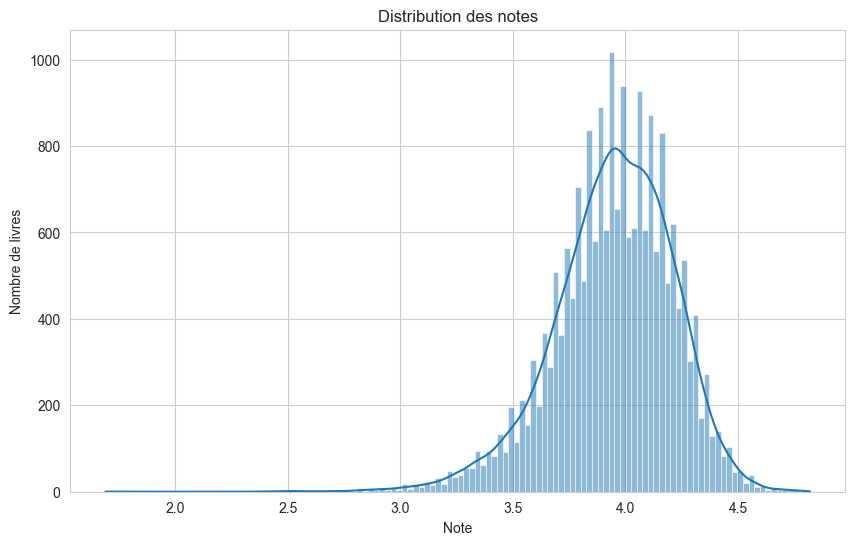

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df_final2, x="Rating", kde=True, palette='husl')
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Nombre de livres')
plt.show()

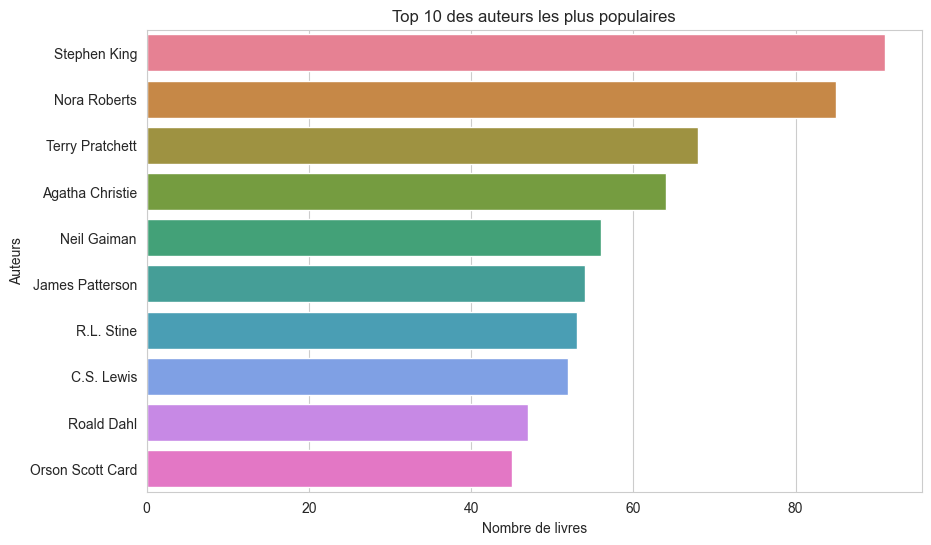

In [30]:
top_authors = df_final2['Authors'].value_counts().head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='husl')
plt.title('Top 10 des auteurs les plus populaires')
plt.xlabel('Nombre de livres')
plt.ylabel('Auteurs')
plt.show()


In [31]:
import requests
import pandas as pd

# trouver l'année de publication d'un livre à partir de l'API Google
def get_book_year(isbn):
    url = f'https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}'
    response = requests.get(url)
    data = response.json()
    try:
        year = data['items'][0]['volumeInfo']['publishedDate'][:4]
    except:
        year = None
    return year

df_final2['PublicationYear'] = df_final2['ISBN'].apply(get_book_year)
print(df_final2)

KeyboardInterrupt: 

In [ ]:
df_final2

,Id,Name,RatingDist1,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Genre,PublicationYear
115871,201120,Saint Iggy,1:37,4:457,total:1358,1,9,HMH Books for Young Readers,271,2006,NaN,K.L. Going,3.70,2:141,5:355,0152057951,3:368,Juvenile Fiction,2006
71826,122914,"Midnight on the Moon (Magic Tree House, #8)",1:273,4:3345,total:12291,29,10,Random House Books for Young Readers,399,1996,eng,Mary Pope Osborne,3.93,2:786,5:4687,0679863745,3:3200,Juvenile Fiction,1996
7027,11570,Dreamcatcher,1:5913,4:43782,total:146595,1,3,Albin Michel,1633,2002,fre,Stephen King,3.63,2:15932,5:37999,2226131906,3:42969,Fiction,2002
16839,28239,Dark Star Safari: Overland from Cairo to Cape ...,1:283,4:5029,total:12438,5,4,Mariner Books,731,2004,eng,Paul Theroux,3.96,2:647,5:4068,0618446877,3:2411,Travel,2004
73256,125423,The Very Quiet Cricket,1:447,4:5424,total:18851,9,11,Philomel Books,331,1990,en-US,Eric Carle,4.07,2:851,5:8261,0399218858,3:3868,Juvenile Fiction,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,16790,Smoke and Mirrors: Short Fiction and Illusions,1:434,4:25894,total:62172,30,8,Avon Books,1919,2005,eng,Neil Gaiman,4.04,2:2160,5:20756,0380789027,3:12928,Fiction,2005
6354,10430,Cuba Diaries: An American Housewife in Havana,1:21,4:362,total:905,13,5,Broadway Books,101,2003,NaN,Isadora Tattlin,3.52,2:89,5:122,0767914848,3:311,Americans,None
373124,872109,"Wit'ch Fire (The Banned and the Banished, #1)",1:195,4:2167,total:6277,1,3,Del Rey,220,1999,eng,James Clemens,3.91,2:399,5:2157,0345417062,3:1359,Fiction,1999
159647,278656,City of Dreams: A Novel of Nieuw Amsterdam and...,1:65,4:1405,total:3561,18,6,Simon Schuster,359,2002,eng,Beverly Swerling,3.96,2:189,5:1169,0684871734,3:733,Fiction,2002


In [ ]:
# Enregistrer le DataFrame en fichier CSV
df_final2.to_csv("./Data/df_final2.csv", index=False)

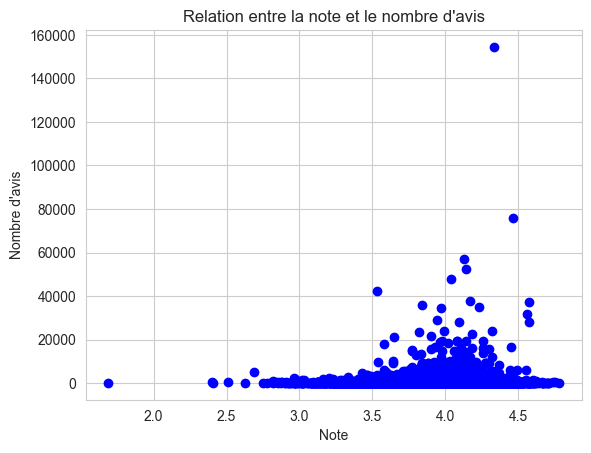

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#  un nuage de points pour montrer la relation entre la note et le nombre d'avis
plt.scatter(df_final2['Rating'], df_final2['CountsOfReview'], color='blue')
plt.title('Relation entre la note et le nombre d\'avis')
plt.xlabel('Note')
plt.ylabel('Nombre d\'avis')
plt.show()


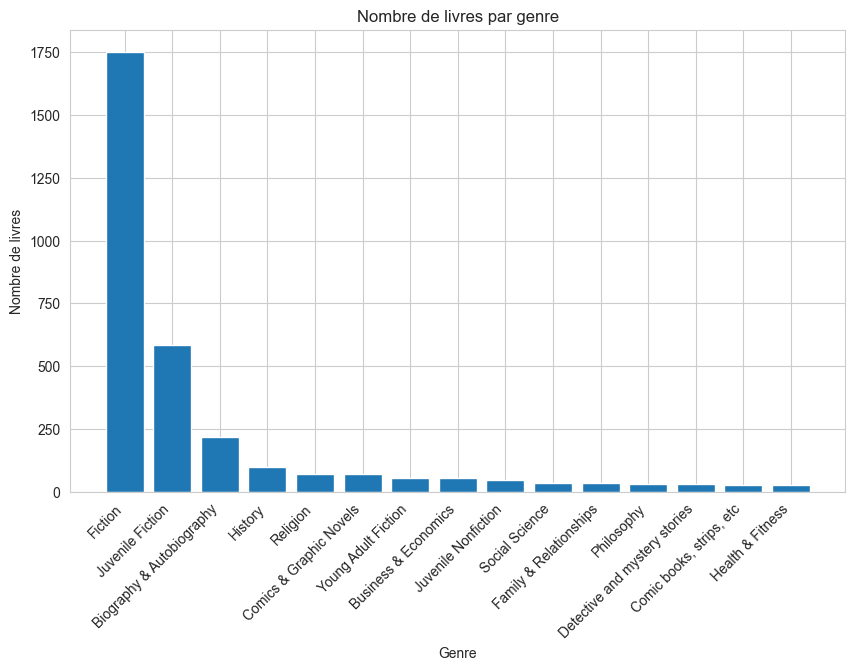

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_genres = df_final2['Genre'].value_counts().head(15)
plt.figure(figsize=(10,6))
plt.bar(top_genres.index, top_genres.values)
plt.title('Nombre de livres par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de livres')
plt.xticks(rotation=45, ha='right')
plt.show()


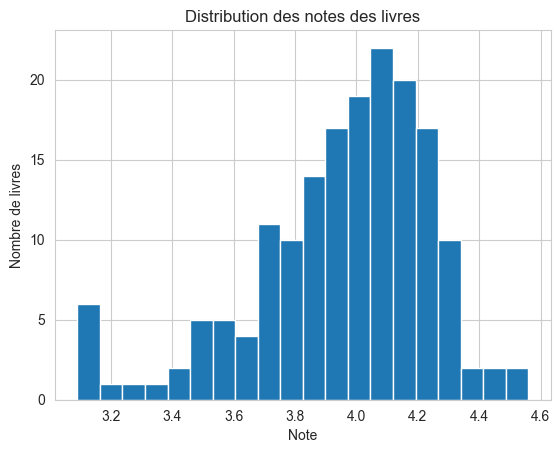

In [ ]:
import matplotlib.pyplot as plt

# histogramme avec les notes des livres
plt.hist(df_final2['Rating'], bins=20)
plt.xlabel('Note')
plt.ylabel('Nombre de livres')
plt.title('Distribution des notes des livres')
plt.show()


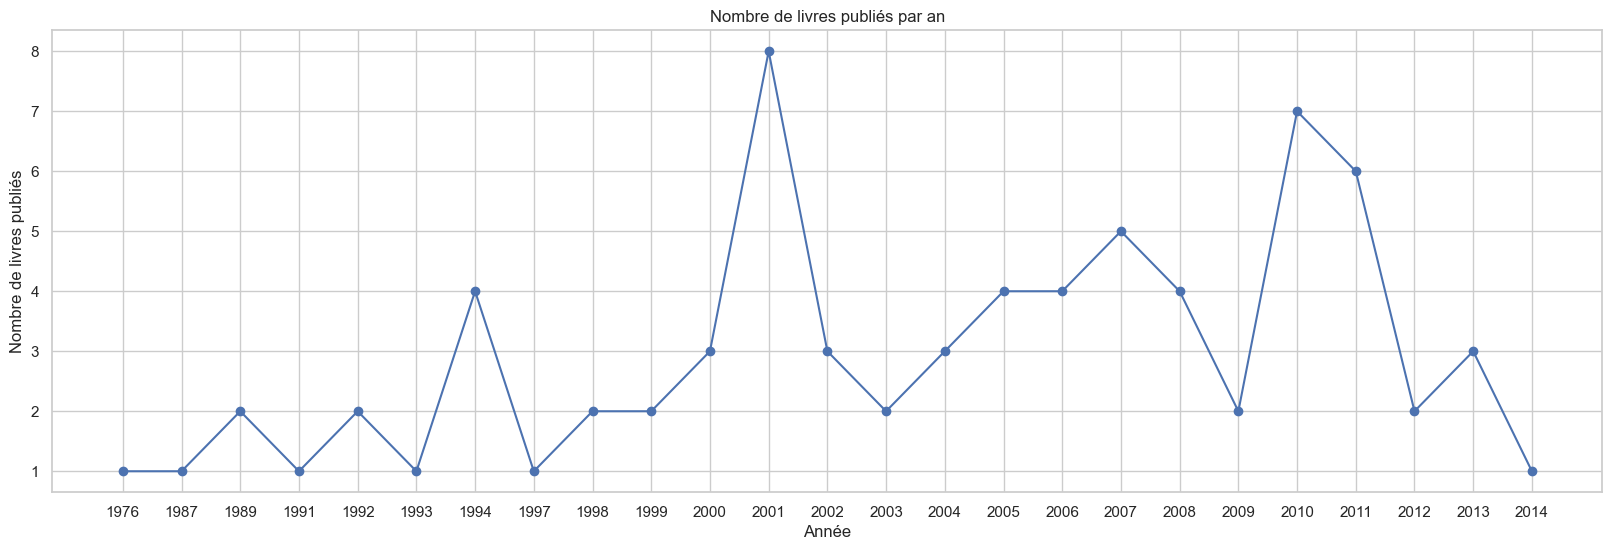

In [ ]:
import matplotlib.pyplot as plt

df_by_year = df_final2.groupby('PublicationYear')['Name'].count().reset_index(name='count')
plt.figure(figsize=(20, 6))
plt.plot(df_by_year['PublicationYear'], df_by_year['count'], marker='o')
plt.title('Nombre de livres publiés par an')
plt.xlabel('Année')
plt.ylabel('Nombre de livres publiés')
plt.show()

In [ ]:
pip install streamlit

     ---------------------------------------- 8.9/8.9 MB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 238.7/238.7 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 904.0/904.0 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 21.5/21.5 MB 990.4 kB/s eta 0:00:00
     ------------------------------------ 164.8/164.8 kB 898.7 kB/s eta 0:00:00
     -------------------------------------- 184.3/184.3 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 914.4 kB/s eta 0:00:00
     ---------------------------------------- 82.0/82.0 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 55.8/55.8 kB 584.6 kB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 1.1 MB/s eta 0:00:00
     ---------------

  DEPRECATION: validators is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
data = pd.read_csv("./Data/GoodReads_100k_books.csv")


In [ ]:
data

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Simon Monk,ebook,Design custom printed circuit boards with EAGL...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,71819266,9.78007E+12,https://goodreads.com/book/show/17320181-make-...,304,4.07,7,Make Your Own PCBs with Eagle: From Schematic ...,56
99996,"Tracie L. Miller-Nobles,Brenda L. Mattison,Ell...",Hardcover,"Redefining tradition in learning accounting. ,...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,133251241,9.78013E+12,https://goodreads.com/book/show/17320260-horng...,1645,4.05,1,Horngren's Financial & Managerial Accounting,38
99997,C. John Miller,Paperback,In these warm reflections on his own growth as...,"Christianity,Evangelism,Christian,Religion,The...",https://i.gr-assets.com/images/S/compressed.ph...,875523919,9.78088E+12,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122
99998,Albert Marrin,Hardcover,"John Brown is a man of many legacies, from her...","Nonfiction,History,Biography,Military History,...",https://i.gr-assets.com/images/S/compressed.ph...,307981533,9.78031E+12,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156


In [ ]:
import folium

ville = {
    "Mayence": {"location": [49.9929, 8.2473], "year": 1450},
    "Strasbourg": {"location": [48.5734, 7.7521], "year": 1450},
    "Subiaco": {"location": [41.9267, 13.1056], "year": 1465},
    "Venise": {"location": [45.4408, 12.3155], "year": 1470},
    "Rome": {"location": [41.9028, 12.4964], "year": 1467},
    "Paris": {"location": [48.8566, 2.3522], "year": 1470},
    "Lyon": {"location": [45.75, 4.85], "year": 1473},
    "Cracovie": {"location": [50.0647, 19.945], "year": 1473},
    "Séville": {"location": [37.3891, -5.9845], "year": 1477},
    "Anvers": {"location": [51.2194, 4.4025], "year": 1480}
}

# Création de la carte
carte = folium.Map(location=[50, 10], zoom_start=4)

# Ajout des marqueurs pour chaque ville
for city, info in ville.items():
    year = info["year"]
    tooltip = f"{city} ({year})"
    folium.Marker(
        location=info["location"],
        tooltip=tooltip,
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(75, 18),
            html=f'<div style="background-color: black; color: white; padding: 5px; font-weight: bold; text-align: center;">{city}</div><div style="background-color: black; color: white; padding: 5px; font-size: 12px; text-align: center;">{year}</div>'
        )
    ).add_to(carte)

# Affichage de la carte
carte
